https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb (ref) <br/>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
remove_parts = ('headers', 'footers', 'quotes')
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

data_train = fetch_20newsgroups(subset='train', remove=remove_parts, categories=categories)
data_valid = fetch_20newsgroups(subset='test', remove=remove_parts, categories=categories)

In [ ]:
data_train.keys(), data_valid.keys()

(dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR']),
 dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR']))

In [ ]:
len(data_train['data']), len(data_valid['data'])

(2034, 1353)

In [ ]:
print(" ".join(data_train['data'][:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries. 
 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [ ]:
np.array(data_train.target_names)[data_train.target]

array(['comp.graphics', 'talk.religion.misc', 'sci.space', ...,
       'comp.graphics', 'alt.atheism', 'comp.graphics'], dtype='<U18')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html (ref)

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(data_train.data).todense()
vectors.shape

(2034, 26576)

In [ ]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape, vocab[:5], vocab[vocab.shape[0]-5:]

((26576,),
 array(['00', '000', '0000', '00000', '000000'], dtype='<U80'),
 array(['zwak', 'zwakke', 'zware', 'zwarte', 'zyxel'], dtype='<U80'))

In [ ]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html (ref)

In [ ]:
%time U,S,Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 2min 17s, sys: 1min 3s, total: 3min 20s
Wall time: 29.7 s


In [ ]:
U.shape,S.shape,Vh.shape

((2034, 2034), (2034,), (2034, 26576))

In [ ]:
o = U@np.diag(S)@Vh

In [ ]:
o.shape

(2034, 26576)

In [ ]:
np.allclose(vectors, o)

True

In [ ]:
np.allclose((U@U.T), np.identity(U.shape[0]))

True

In [ ]:
np.allclose((Vh@Vh.T), np.identity(Vh.shape[0]))

True

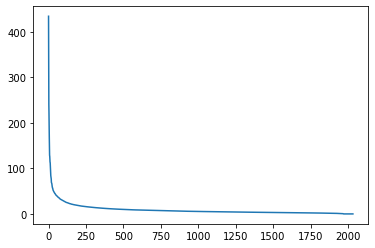

In [ ]:
plt.plot(S);

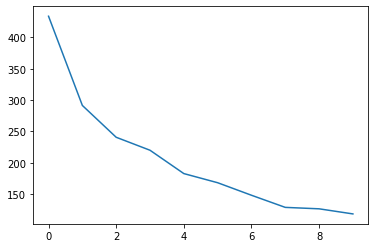

In [ ]:
plt.plot(S[:10]);

In [ ]:
num_top_words = 8 

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words:-1]]
    topic_words = [top_words(t) for t in a]
    return [" ".join(t) for t in topic_words]

In [ ]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal',
 'jpeg gif file color quality image jfif',
 'graphics edu pub mail 128 3d ray',
 'jesus god matthew people atheists atheism does',
 'image data processing analysis software available tools',
 'god atheists atheism religious believe religion argument',
 'space nasa lunar mars probe moon missions',
 'image probe surface lunar mars probes moon',
 'argument fallacy conclusion example true ad argumentum',
 'space larson image theory universe physical nasa']

https://arxiv.org/pdf/1401.5226.pdf (non-negative matrix factorization)

In [ ]:
m,n = vectors.shape
d = 5

In [ ]:
clf = decomposition.NMF(n_components=d, random_state=1)
W1 = clf.fit_transform(vectors)
H1 = clf.components_

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [ ]:
W1.shape,H1.shape

((2034, 5), (5, 26576))

In [ ]:
show_topics(H1)

['jpeg image gif file color images format',
 'edu graphics pub mail 128 ray ftp',
 'space launch satellite nasa commercial satellites year',
 'jesus god people matthew atheists does atheism',
 'image data available software processing ftp edu']

https://tfidf.com/ (tdf-idf)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = tfidf.fit_transform(data_train.data)
vectors_tfidf.shape

(2034, 26576)

In [ ]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_
W1.shape,H1.shape

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


((2034, 5), (5, 26576))

In [ ]:
show_topics(H1)

['people don think just like objective say',
 'graphics thanks files image file program windows',
 'space nasa launch shuttle orbit moon lunar',
 'ico bobbe tek beauchaine bronx manhattan sank',
 'god jesus bible believe christian atheism does']

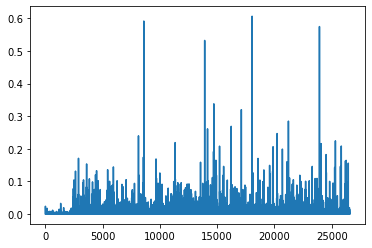

In [ ]:
plt.plot(H1[0]);

In [ ]:
clf.reconstruction_err_

43.71292605795278

https://arxiv.org/abs/0909.4061 (probabilistic algo for matrix decompositionm)

In [ ]:
# C: (m,n) <- original matrix
# U: (m,m) <- left singular vectors
# V: (n,n) <- right singular vectors
# S: (m,n) <- singular values
# SVD(C) = U @ S @ V.transpose() <- (m,m) @ (m,n) @ (n,n)
# time complexity: min(mn^2, m^2n)

In [ ]:
%time U,S,V = decomposition.randomized_svd(vectors, 5)

CPU times: user 10 s, sys: 14.7 s, total: 24.8 s
Wall time: 4.5 s


In [ ]:
show_topics(V)

['jpeg image edu file graphics images gif',
 'jpeg gif file color quality image jfif',
 'space jesus launch god people satellite matthew',
 'jesus god matthew people atheists atheism does',
 'image data processing analysis software available tools']

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
data_faces, _ = fetch_olivetti_faces(return_X_y=True, random_state=1)
data_faces = data_faces.transpose()
data_faces.shape

(4096, 400)

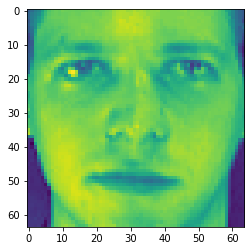

In [ ]:
plt.imshow(data_faces[:,0].reshape(64, 64));

In [ ]:
# n_components=low rank dim

clf = decomposition.NMF(n_components=100, random_state=1)
W1 = clf.fit_transform(data_faces)
H1 = clf.components_
W1.shape, H1.shape

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [ ]:
_,axs = plt.subplots(1, 3, figsize=(10, 3))
for w,ax in zip(W1.transpose(), axs.flat):
    ax.imshow(w.reshape(64, 64))
    ax.axis('off')

In [ ]:
_,axs = plt.subplots(1, 3, figsize=(10, 3))
for h,ax in zip(H1, axs.flat):
    ax.imshow(h.reshape(20, 20))
    ax.axis('off')

In [ ]:
W1[:,0].min(), W1[:,0].max()

In [ ]:
hist = np.histogram(W1[:,0], bins=100)
hist[0].shape, hist[1].shape

In [ ]:
plt.bar(hist[1][:-1], hist[0], width=(hist[1][1] - hist[1][0]));

In [ ]:
plt.hist(W1[:,0], bins=100);

In [ ]:
_,axs = plt.subplots(1, 3, figsize=(15, 3))
for h,ax in zip(H1, axs.flat):
    ax.hist(h, bins=100)

In [ ]:
_,axs = plt.subplots(1, 3, figsize=(15, 3))
for h,ax in zip(H1, axs.flat):
    ax.hist(h)

In [ ]:
rec_images = W1@H1
rec_images.shape

In [ ]:
_,axs = plt.subplots(1, 10, figsize=(20, 20))
for w,ax in zip(data_faces.transpose(), axs.flat):
    ax.imshow(w.reshape(64, 64))
    ax.axis('off')
    ax.set_title('original')

_,axs = plt.subplots(1, 10, figsize=(20, 20))                   
for w,ax in zip(rec_images.transpose(), axs.flat):
    ax.imshow(w.reshape(64, 64))
    ax.axis('off')
    ax.set_title('reconstructed')